Machine learning ES 335 pre-requisite test

Name -  Maharshi Patel
Roll no. - 24210059


1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

A - 'n x m x k' multiplications and 'n x m x (k-1)' additions

To find the value of each entry in the resulting matrix, we take a row from the first matrix and a column from the second matrix. For each position in the resulting matrix, we calculate a sum by multiplying corresponding elements from the row of the first matrix and the column of the second matrix, then adding those products together. Each of these sums fills in one position of the new matrix. now the resulting matrix will have 'n x m' elements and to achieve each of this element we need to perform 'k' multiplication. thus we will in total need 'n x m x k' multiplications. now for each of the resulting element there will be 'k-1' additions thus there will be 'n x m x (k-1)' additions.

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

A - Time taken with numpy is more than without using numpy. 
time taken for matrix multiplication : 0.0000696182
time taken with numpy : 0.001091003

one word reason - overhead

This is because numpy is a standard library which tends to give standard solution to a big complex problem, a big complex problem requires optimization which is implemented in numpy. when given an small problem numpy will still solve it by going through all the steps to solve a big problem, which causes overhead due to which numpy is taking more time here.4

In [31]:
import time

def matrix_multiply(A, B):
    n = len(A)       
    k = len(A[0])
    m = len(B[0])     

    C = [[0] * m for x in range(n)]
    
    for i in range(n):
        for j in range(m):
            C[i][j] = sum(A[i][l] * B[l][j] for l in range(k))
    
    return C

A = [[100, 200, 100],[2000, 1000, 2000]] #2x3
B = [[1000, 2000],[100, 100],[200, 100]] #3x2

start_time = time.time() 
C = matrix_multiply(A, B)
end_time = time.time()   

elapsed_time = end_time - start_time
print(f'time taken for matrix multiplication : {elapsed_time:.10f}')

import numpy as np

X = np.array([[100, 200, 100],[2000, 1000, 2000]])
Y = np.array([[1000, 2000],[100, 100],[200, 100]])

start_time_with_np = time.time()  
D = np.dot(A, B)         
end_time_with_np = time.time()   

elapsed_time_with_np = end_time_with_np - start_time_with_np
print(f'time taken with numpy : {elapsed_time_with_np:.10f}')




time taken for matrix multiplication : 0.0000696182
time taken with numpy : 0.0010910034


3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

A - Time complexity to find median by first strategy - O(n^2) (because i need to compare n/2 elements with n elements which is n x n/2)

- An alternative method can be to sort the array first using sorting algorithm with TC O(n x logn). then we can directly pick up median from there. thus T.C. will be O(n x logn).

- Comparison is done below.
Median using naive method: 49833.0
Time taken for naive method: 0.8138496875762939453125000 seconds
Median using sorting-based method: 49833.0
Time taken for sorting-based method: 0.0010018348693847656250000 seconds
Median using NumPy routine: 49833.0
Time taken for NumPy routine: 0.0000000000000000000000000 se

numpy.median is fast due to its use of efficient algorithms and low-level optimizations and implementation on C.conds

In [89]:
import numpy as np
import time

def find_median_naive(arr):
    n = len(arr)
    sorted_elements = []
    for _ in range((n // 2) + 1):
        max_elem = max(arr)
        sorted_elements.append(max_elem)
        arr.remove(max_elem)
    return sorted_elements[-1] if n % 2 == 1 else (sorted_elements[-1] + sorted_elements[-2]) / 2

def median_sorting_based(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_arr[mid - 1] + sorted_arr[mid]) / 2.0
    else:
        return sorted_arr[mid]

import random

# Example array
arr = np.random.randint(0, 100000, 10000).tolist()
arr1 = arr.copy()
arr2 = arr.copy()
arr3 = arr.copy()
arr4 = arr.copy()

start_time = time.time()
median_sorting = find_median_naive(arr1)
end_time = time.time()
time_sorting = end_time - start_time

print(f"Median using naive method: {median_sorting}")
print(f"Time taken for naive method: {time_sorting:.25f} seconds")

# Measure time for sorting-based median
start_time = time.time()
median_sorting = median_sorting_based(arr2)
end_time = time.time()
time_sorting = end_time - start_time

print(f"Median using sorting-based method: {median_sorting}")
print(f"Time taken for sorting-based method: {time_sorting:.25f} seconds")

# Measure time for NumPy median
start_time = time.time()
median_numpy = np.median(arr4)
end_time = time.time()
time_numpy = end_time - start_time

print(f"Median using NumPy routine: {median_numpy}")
print(f"Time taken for NumPy routine: {time_numpy:.25f} seconds")


Median using naive method: 49833.0
Time taken for naive method: 0.8138496875762939453125000 seconds
Median using sorting-based method: 49833.0
Time taken for sorting-based method: 0.0010018348693847656250000 seconds
Median using NumPy routine: 49833.0
Time taken for NumPy routine: 0.0000000000000000000000000 seconds


4. What is the gradient of the following function with respect to x and y?
$$x^2y + y^3sin(x)$$
 to find gradient we need to find partial derivatives of given function.
gradient of $$f(x,y) = (\frac{\partial f(x,y)}{\partial x} , \frac{\partial f(x,y)}{\partial y} ) $$
which will be equal to,
$$ \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left( 2xy + y^3 \cos(x), x^2 + 3y^2 \sin(x) \right) $$



In [108]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
partial_f_x = sp.diff(f, x)
partial_f_y = sp.diff(f, y)
partial_f_x, partial_f_y

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

5 . Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

A - I am getting same values, shown below

(Array(1.0971053, dtype=float32), Array(1.1017004, dtype=float32)), --> (1.09710524484881, 1.1017005513422287)

  (Array(0.79013664, dtype=float32), Array(0.86827624, dtype=float32)) --> (0.7901366259324358, 0.868276306080588)
  
  ( (Array(0.79290414, dtype=float32), Array(0.69398403, dtype=float32) --> (0.7929041729095424, 0.6939840939515852)
  
  
  (Array(1.4228252, dtype=float32), Array(1.2024682, dtype=float32 --> (1.4228252464450428, 1.202468211056206))),
  
  (Array(0.7711802, dtype=float32), Array(1.2909008, dtype=float32 --> (0.771180248247161, 1.2909008717950767)950767)])

In [132]:
import jax
import jax.numpy as jnp
import numpy as np
import math

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

gradient_f = jax.grad(f, (0, 1))

np.random.seed(0)
random_values = np.random.rand(5, 2)

evaluated_gradients_by_jax = [gradient_f(x, y) for x, y in random_values]


def grad_normal(x,y) :
    return (2*x*y + y**3*math.cos(x), x**2 + 3*y**2*math.sin(x))
    
eval_grad_normal = [grad_normal(x,y) for x, y in random_values]
evaluated_gradients_by_jax ,eval_grad_normal

([(Array(1.0971053, dtype=float32), Array(1.1017004, dtype=float32)),
  (Array(0.79013664, dtype=float32), Array(0.86827624, dtype=float32)),
  (Array(0.79290414, dtype=float32), Array(0.69398403, dtype=float32)),
  (Array(1.4228252, dtype=float32), Array(1.2024682, dtype=float32)),
  (Array(0.7711802, dtype=float32), Array(1.2909008, dtype=float32))],
 [(1.09710524484881, 1.1017005513422287),
  (0.7901366259324358, 0.868276306080588),
  (0.7929041729095424, 0.6939840939515852),
  (1.4228252464450428, 1.202468211056206),
  (0.771180248247161, 1.2909008717950767)])

6. Use sympy to confirm that you obtain the same gradient analytically.


A - I haven't done pen paper calculation of the gradient i directly used sympy only in question 5. please refer there.


7 . Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
h 1
Branch 2

In [144]:
students_records = {
    2022: {
        'Branch 1': {
            1: {'Name': 'Amit', 'Marks': {'Maths': 100, 'English': 70}},
            2: {'Name': 'Bhavna', 'Marks': {'Maths': 85, 'English': 90}}
        },
        'Branch 2': {
            1: {'Name': 'Chetan', 'Marks': {'Maths': 95, 'English': 80}},
            2: {'Name': 'Divya', 'Marks': {'Maths': 78, 'English': 88}}
        }
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'Esha', 'Marks': {'Maths': 92, 'English': 75}},
            2: {'Name': 'Farhan', 'Marks': {'Maths': 88, 'English': 82}}
        },
        'Branch 2': {
            1: {'Name': 'Gauri', 'Marks': {'Maths': 85, 'English': 89}},
            2: {'Name': 'Harish', 'Marks': {'Maths': 90, 'English': 93}}
        }
    },
    2024: {
        'Branch 1': {
            1: {'Name': 'Isha', 'Marks': {'Maths': 77, 'English': 85}},
            2: {'Name': 'Jay', 'Marks': {'Maths': 84, 'English': 88}}
        },
        'Branch 2': {
            1: {'Name': 'Kiran', 'Marks': {'Maths': 80, 'English': 92}},
            2: {'Name': 'Lakshmi', 'Marks': {'Maths': 83, 'English': 87}}
        }
    },
    2025: {
        'Branch 1': {
            1: {'Name': 'Manish', 'Marks': {'Maths': 90, 'English': 85}},
            2: {'Name': 'Nidhi', 'Marks': {'Maths': 88, 'English': 80}}
        },
        'Branch 2': {
            1: {'Name': 'Om', 'Marks': {'Maths': 95, 'English': 90}},
            2: {'Name': 'Pooja', 'Marks': {'Maths': 92, 'English': 88}}
        }
    }
}


8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [151]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

db = Database()

year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)

branch_1_2022 = Branch("Branch 1")
branch_2_2022 = Branch("Branch 2")

branch_1_2023 = Branch("Branch 1")
branch_2_2023 = Branch("Branch 2")

branch_1_2024 = Branch("Branch 1")
branch_2_2024 = Branch("Branch 2")

branch_1_2025 = Branch("Branch 1")
branch_2_2025 = Branch("Branch 2")

branch_1_2022.add_student(Student(1, "Amit", {"Maths": 100, "English": 70}))
branch_1_2022.add_student(Student(2, "Bhavna", {"Maths": 85, "English": 90}))

branch_2_2022.add_student(Student(1, "Chetan", {"Maths": 95, "English": 80}))
branch_2_2022.add_student(Student(2, "Divya", {"Maths": 78, "English": 88}))

branch_1_2023.add_student(Student(1, "Esha", {"Maths": 92, "English": 75}))
branch_1_2023.add_student(Student(2, "Farhan", {"Maths": 88, "English": 82}))

branch_2_2023.add_student(Student(1, "Gauri", {"Maths": 85, "English": 89}))
branch_2_2023.add_student(Student(2, "Harish", {"Maths": 90, "English": 93}))

branch_1_2024.add_student(Student(1, "Isha", {"Maths": 77, "English": 85}))
branch_1_2024.add_student(Student(2, "Jay", {"Maths": 84, "English": 88}))

branch_2_2024.add_student(Student(1, "Kiran", {"Maths": 80, "English": 92}))
branch_2_2024.add_student(Student(2, "Lakshmi", {"Maths": 83, "English": 87}))

branch_1_2025.add_student(Student(1, "Manish", {"Maths": 90, "English": 85}))
branch_1_2025.add_student(Student(2, "Nidhi", {"Maths": 88, "English": 80}))

branch_2_2025.add_student(Student(1, "Om", {"Maths": 95, "English": 90}))
branch_2_2025.add_student(Student(2, "Pooja", {"Maths": 92, "English": 88}))

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)

year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)

year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)

db.add_year(year_2022)
db.add_year(year_2023)
db.add_year(year_2024)
db.add_year(year_2025)

print(db.years[0].branches[0].students[0].marks)

{'Maths': 100, 'English': 70}


9 . plot the following functions


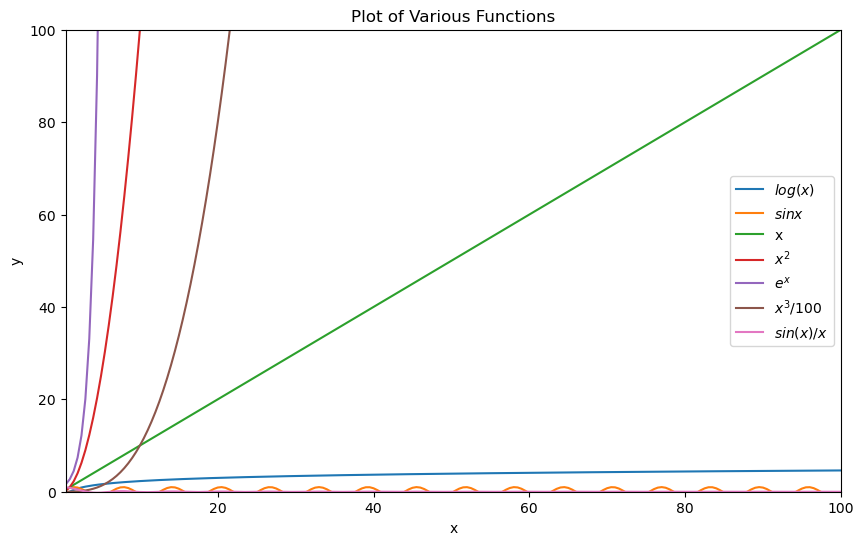

In [233]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5) #i've taken 100.5 to include 100.0
#print(x)

y_log = np.log(x)
y_linear = x
y_square = x**2
y_exp = np.exp(x)
y_sin = np.sin(x)
y_cube = x**3/100
y_sin1 = np.sin(x)/x

plt.figure(figsize=(10, 6))

plt.plot(x, y_log, label='$log(x)$')
plt.plot(x, y_sin, label='$sin{x}$')
plt.plot(x, y_linear, label='x')
plt.plot(x, y_square, label='$x^2$')
plt.plot(x, y_exp, label='$e^x$')
plt.plot(x, y_cube, label='$x^3/100$')
plt.plot(x, y_sin1, label='$sin(x)/x$')

plt.ylim([0, 100])  
plt.xlim([0.5, 100])  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Various Functions')
plt.legend()

plt.show()


10 . Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.


In [215]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

highest_std_column = df.std().idxmax()

lowest_mean_row = df.mean(axis=1).idxmin()

print(df)
print("Column with the highest standard deviation: ", highest_std_column)
print("Row with the lowest mean: ", lowest_mean_row)


           a         b         c         d         e
0   1.711870  1.053734  1.396223  1.167436  1.821904
1   1.700529  1.883078  1.966575  1.774748  1.994233
2   1.614770  1.037130  1.014252  1.342104  1.823472
3   1.866135  1.960813  1.065121  1.044571  1.913284
4   1.305047  1.557987  1.982445  1.400449  1.665871
5   1.400880  1.768195  1.527715  1.237523  1.271306
6   1.258059  1.532320  1.703189  1.949280  1.694087
7   1.781193  1.168926  1.374063  1.413780  1.686380
8   1.295892  1.303292  1.355889  1.810302  1.577590
9   1.075277  1.078246  1.371287  1.766591  1.688683
10  1.707982  1.767210  1.287153  1.548256  1.543353
11  1.739633  1.956871  1.277990  1.793282  1.659971
12  1.580238  1.774880  1.944032  1.036691  1.147400
13  1.756287  1.083791  1.516124  1.219861  1.274296
14  1.701840  1.030193  1.873319  1.444479  1.502393
15  1.540048  1.645544  1.344857  1.101107  1.318379
16  1.168142  1.556133  1.318029  1.958067  1.965734
17  1.620126  1.617497  1.985379  1.887283  1.

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [218]:
df['f'] = df.sum(axis=1)
df['g'] = ''

for i in range(len(df)):
    if df['f'][i] < 8:
        df['g'][i] = 'LT8'
    else:
        df['g'][i] = 'GT8'
num_rows_lt8 = df[df['g'] == 'LT8'].shape[0]

std_f_lt8 = df[df['g'] == 'LT8']['f'].std()
std_f_gt8 = df[df['g'] == 'GT8']['f'].std()

print(df)
print("Number of rows where the value in 'g' is 'LT8':", num_rows_lt8)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_f_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_f_gt8)

           a         b         c         d         e         f    g
0   1.711870  1.053734  1.396223  1.167436  1.821904  7.151166  LT8
1   1.700529  1.883078  1.966575  1.774748  1.994233  9.319162  GT8
2   1.614770  1.037130  1.014252  1.342104  1.823472  6.831727  LT8
3   1.866135  1.960813  1.065121  1.044571  1.913284  7.849923  LT8
4   1.305047  1.557987  1.982445  1.400449  1.665871  7.911799  LT8
5   1.400880  1.768195  1.527715  1.237523  1.271306  7.205618  LT8
6   1.258059  1.532320  1.703189  1.949280  1.694087  8.136936  GT8
7   1.781193  1.168926  1.374063  1.413780  1.686380  7.424342  LT8
8   1.295892  1.303292  1.355889  1.810302  1.577590  7.342965  LT8
9   1.075277  1.078246  1.371287  1.766591  1.688683  6.980085  LT8
10  1.707982  1.767210  1.287153  1.548256  1.543353  7.853954  LT8
11  1.739633  1.956871  1.277990  1.793282  1.659971  8.427745  GT8
12  1.580238  1.774880  1.944032  1.036691  1.147400  7.483242  LT8
13  1.756287  1.083791  1.516124  1.219861  1.27

C:\Users\Sky\AppData\Local\Temp\ipykernel_5640\740518337.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['g'][i] = 'LT8'
C:\Users\Sky\AppData\Local\Temp\ipykernel_5640\740518337.py:6: SettingWithCopyWarning: 
A value is trying to be s

12. Write a small piece of code to explain broadcasting in numpy.

A- Broadcasting in numpy refers to the ability to perform arithmetic operations on arrays of different shapes. numpy automatically expands the smaller array along other dimensions so that it matches the shape of the larger array, and then arithmatic operations can be performed over it.

below is given an example of the same.


In [225]:
a = np.array([1, 2, 3])

b = np.array([[10], [20], [30]])

result = a + b

print(a)
print(b)
print(result)

[1 2 3]
[[10]
 [20]
 [30]]
[[11 12 13]
 [21 22 23]
 [31 32 33]]


13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [223]:
def manual_argmin(array):
    min_index = 0
    min_value = array[0]
    for i in range(1, len(array)):
        if array[i] < min_value:
            min_value = array[i]
            min_index = i
    return min_index

array = np.array([7, 2, 5, 4, 3, 9, 2, 6, 1, 3, 5])

custom_min_index = manual_argmin(array)

numpy_min_index = np.argmin(array)

print(array)
print("Custom argmin:", custom_min_index)
print("numpy argmin:", numpy_min_index)

[7 2 5 4 3 9 2 6 1 3 5]
Custom argmin: 8
numpy argmin: 8
